# Scikit learn 예제
- 농구선수의 게임 데이터를 활용한 포지션 예측

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./basketball_stat.csv")
data = data[:100]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  100 non-null    object 
 1   Pos     100 non-null    object 
 2   3P      100 non-null    float64
 3   2P      100 non-null    float64
 4   TRB     100 non-null    float64
 5   AST     100 non-null    float64
 6   STL     100 non-null    float64
 7   BLK     100 non-null    float64
dtypes: float64(6), object(2)
memory usage: 6.4+ KB


In [3]:
# 8:2 비율로 나눔
train, test = train_test_split(data,test_size = 0.2)
print(train.shape)
print(test.shape)

(80, 8)
(20, 8)


#### train data 정제

In [4]:
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [5]:
x_train = x_train.values

In [6]:
y_train = y_train.values.ravel()
y_train

array(['C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'SG', 'SG', 'C',
       'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG',
       'C', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'SG',
       'SG', 'C', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'C', 'C', 'SG', 'SG',
       'SG', 'SG', 'C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'SG',
       'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG'], dtype=object)

#### test data 정제

In [7]:
x_test = test[['3P','BLK','TRB']]
y_test = test['Pos']

In [8]:
x_test = x_test.values
y_test = y_test.values

In [9]:
from sklearn.neighbors import KNeighborsClassifier 

In [10]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
pred_knn = knn.predict(x_test)
pred_knn

array(['C', 'SG', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'SG'], dtype=object)

#### 모델 예측 정확도 확인

In [12]:
from sklearn import metrics

In [13]:
acc_score = metrics.accuracy_score(pred_knn,y_test)
print("ACC : ",acc_score * 100)

ACC :  90.0


In [14]:
comparison = pd.DataFrame({'prediction':pred_knn,'Truth':y_test})
comparison

,prediction,Truth
0,C,C
1,SG,SG
2,C,C
3,C,SG
4,C,C
5,C,C
6,SG,SG
7,C,C
8,SG,SG
9,SG,SG


In [15]:
from sklearn import svm
import matplotlib.pyplot as plt


In [16]:
C = [0.01,0.03,0.1,0.3,1,3,10]
gamma = [0.01,0.03,0.1,0.3,1,3,10]

xlabel = [(i,j) for i in C for j in gamma]

#### gamma 값과 C 값에 따른 정확도 변화

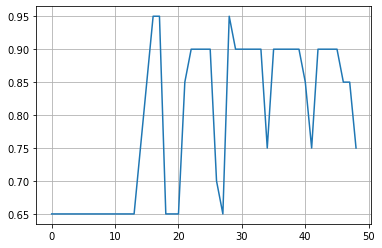

최대 정확도 : 95.0%, C와 gamma값 : (0.1, 0.1)


In [17]:
Acc = list()
max_acc = 0
val = tuple()
for c in C:
    for gam in gamma:
        clf = svm.SVC(C= c,gamma = gam)
        clf.fit(x_train,y_train)
        pred_svm = clf.predict(x_test)
        acc_score = metrics.accuracy_score(y_test,pred_svm)
        Acc.append(acc_score)
        if max_acc < acc_score:
            max_acc = acc_score
            val = (c,gam)

plt.figure()
plt.plot(Acc)
plt.grid()
plt.show()
print(f"최대 정확도 : {max_acc * 100}%, C와 gamma값 : {val}")

In [18]:
pred_svm = clf.predict(x_test)
pred_svm

array(['C', 'SG', 'SG', 'C', 'SG', 'C', 'SG', 'SG', 'SG', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'SG'], dtype=object)

In [19]:
acc_score = metrics.accuracy_score(y_test,pred_svm)
print("ACC : ",acc_score)

ACC :  0.75
